In [35]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [36]:
matplotlib.style.use('ggplot')

In [37]:
master = pd.read_csv('twitter_archive_master.csv')

In [38]:
master.sample(5)

tweet_id            timestamp  \
1147  694206574471057408  2016-02-01 17:11:59   
1687  671151324042559489  2015-11-30 02:18:39   
393   808501579447930884  2016-12-13 02:39:32   
583   772102971039580160  2016-09-03 16:04:27   
882   723673163800948736  2016-04-23 00:41:42   

                                                   text  rating_numerator  \
1147  "Martha come take a look at this. I'm so fed u...              10.0   
1687  *struggling to breathe properly* 12/10 https:/...              12.0   
393   This is Koda. He dug a hole and then sat in it...              12.0   
583   This is Penny. She's an OU cheerleader. About ...              11.0   
882   This is Ivar. She is a badass Viking warrior. ...              10.0   

      rating_denominator    name dog_stage              kind  rating  \
1147                  10     NaN      None          Shih-Tzu     1.0   
1687                  10     NaN      None        Rottweiler     1.2   
393                   10    Koda      None          Airedale     1.2   
583                   10   Penny      None          Pembroke     1.1   
882                   10    Ivar      None  golden_retriever     1.0   

      retweet_count  favorite_count  
1147           2297            4582  
1687            166             714  
393            3007           12595  
583            1065            4448  
882            1011            3291

In [39]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1396 non-null object
dog_stage             1971 non-null object
kind                  1666 non-null object
rating                1971 non-null float64
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 169.5+ KB


In [40]:
master['tweet_id'] = master['tweet_id'].astype(object)
master['timestamp'] = pd.to_datetime(master.timestamp)
master['dog_stage'] = master['dog_stage'].astype('category')
master['kind'] = master['kind'].astype('category')

master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
text                  1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1396 non-null object
dog_stage             1971 non-null category
kind                  1666 non-null category
rating                1971 non-null float64
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 148.8+ KB


In [41]:
master.describe()

rating_numerator  rating_denominator       rating  retweet_count  \
count       1971.000000              1971.0  1971.000000    1971.000000   
mean          11.661119                10.0     1.166112    2784.449518   
std           40.877722                 0.0     4.087772    4697.662893   
min            0.000000                10.0     0.000000      16.000000   
25%           10.000000                10.0     1.000000     628.500000   
50%           11.000000                10.0     1.100000    1367.000000   
75%           12.000000                10.0     1.200000    3239.000000   
max         1776.000000                10.0   177.600000   79515.000000   

       favorite_count  
count     1971.000000  
mean      8949.106545  
std      12267.799790  
min         81.000000  
25%       1997.000000  
50%       4147.000000  
75%      11402.500000  
max     132810.000000

Text(0.5,1,'Rating : Retweet & Favorites Correlation ')

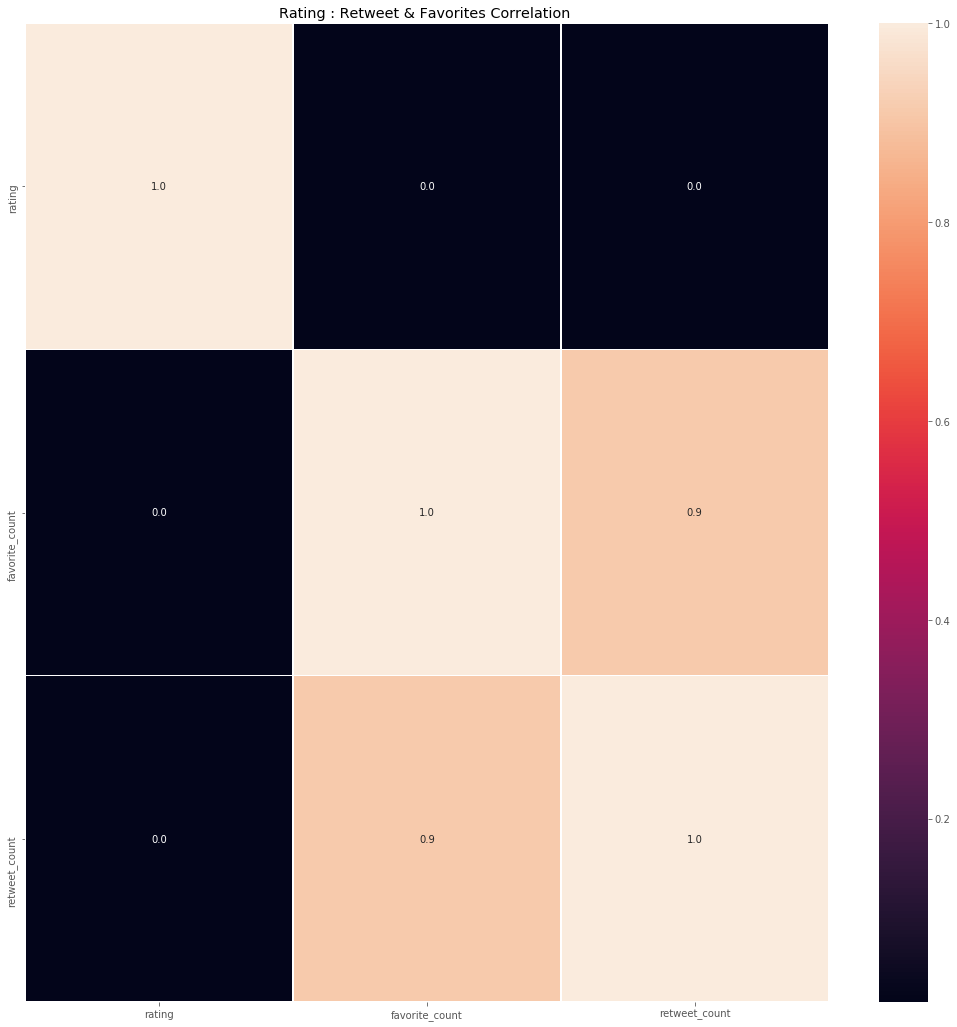

In [42]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(master[['rating', 'favorite_count',
                       'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Rating : Retweet & Favorites Correlation ')

Text(0.5,1,'Retweets and favourites Scatter plot')

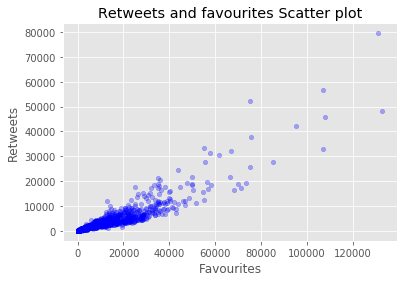

In [43]:
master.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.3, color = 'blue')
plt.xlabel('Favourites')
plt.ylabel('Retweets')
plt.title('Retweets and favourites Scatter plot')

In [54]:
top_retweet = master.text[master.retweet_count == max(master.retweet_count)]


top_favorites = master.text[master.favorite_count == max(master.favorite_count)]

In [58]:
print(top_retweet)

769    Here's a doggo realizing you can stand in a po...
Name: text, dtype: object


In [60]:
print(top_favorites)

306    Here's a super supportive puppo participating ...
Name: text, dtype: object


In [45]:
master['year'] = pd.DatetimeIndex(master['timestamp']).year
master['month'] = pd.DatetimeIndex(master['timestamp']).month

In [46]:
master['month_year'] = master['month'].astype(str)+'/'+master['year'].astype(str)

In [47]:
master['month_year'] = pd.to_datetime(master['month_year'])

In [48]:
counter = master.groupby('month_year')['tweet_id'].count()

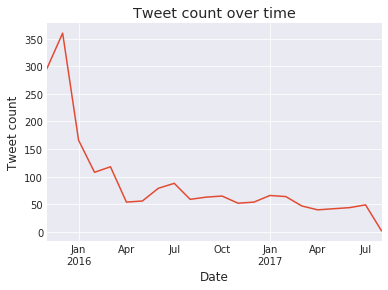

In [52]:
counter.plot(kind='line', )
plt.xlabel('Date')
plt.ylabel('Tweet count')
plt.title('Tweet count over time')
plt.show();